In [55]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.path import Path
import numpy as np
from shapely.geometry import Polygon

import imutils

In [2]:
class ShapeDetector:
    def detect(self, c):
        # initialize the shape name and approximate the contour
        shape = "unidentified"
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.04 * peri, True)

In [3]:
im = cv2.imread("print.jpg")

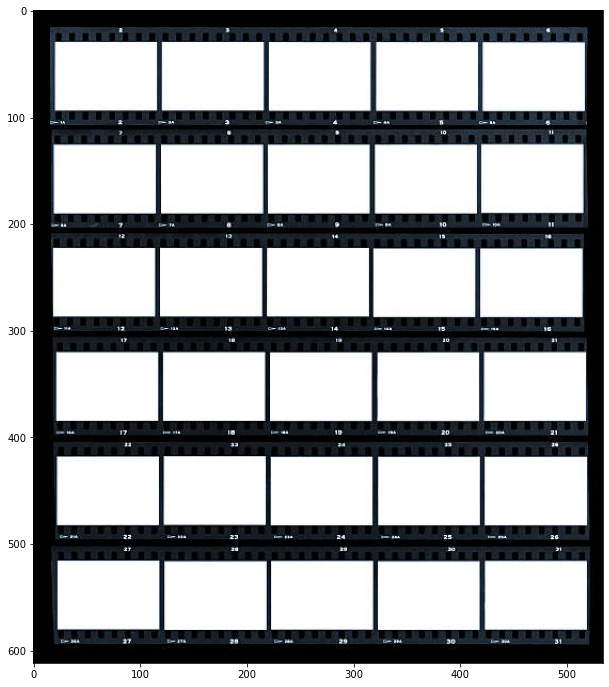

In [4]:
plt.figure(figsize=(16, 12))
plt.imshow(im)

In [5]:
filtered = cv2.bilateralFilter(im, 11, 17, 17)
edged = cv2.Canny(filtered, 30, 200)

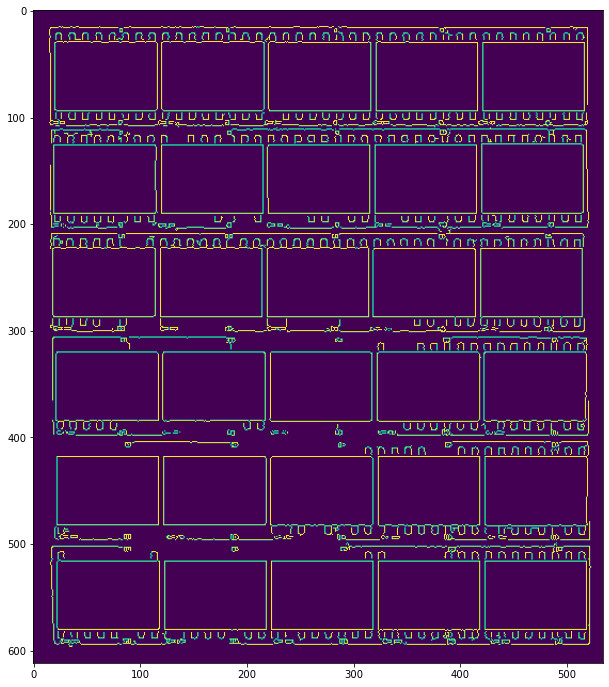

In [6]:
plt.figure(figsize=(16, 12))
plt.imshow(edged)

In [11]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)

In [39]:
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]

In [46]:
def PolyArea(x,y):
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

poly!
poly!
30


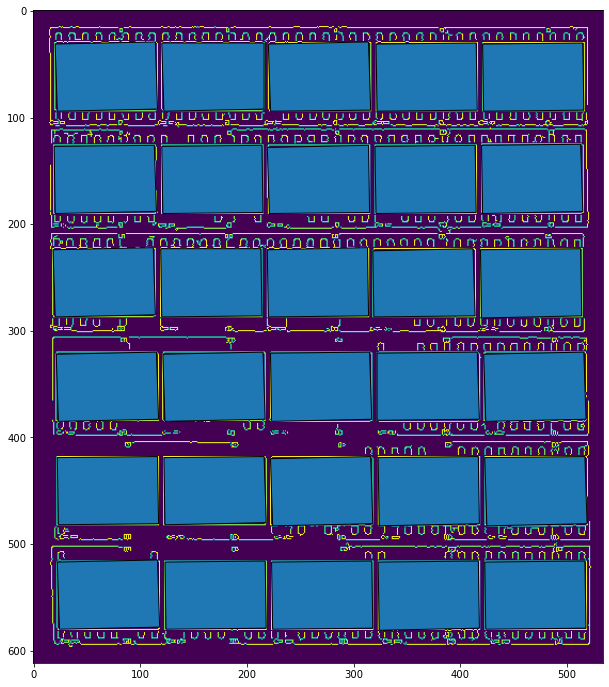

In [59]:
fig, ax = plt.subplots(figsize=(16, 12))
ax.imshow(edged)

found = 0
polys = []

for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.015 * peri, True)
    
    if len(approx) == 4:
        verts = approx.squeeze()
        area = PolyArea(verts[:,0], verts[:, 1])

        if area < 5800 or area > 6000:
            continue
        
        currPoly = Polygon(verts)
        exists = False
        for poly in polys:
            if poly.intersects(currPoly):
                exists = True
                print("poly!")
                break
        
        if exists:
            continue
            
        polys.append(currPoly)
            
        verts = np.concatenate((verts, [verts[0]]))
        path = Path(verts, codes)
        patch = patches.PathPatch(path)
        ax.add_patch(patch)
        
        found += 1
        
print(found)